In [1]:
# !pip install -r requirements.txt

In [2]:
from model_load import load_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load Model

In [3]:
model = load_model()

## Load and Preprocess Data

In [4]:
df_input = pd.read_csv('./data/test.csv', index_col='datetime')

extended_index = pd.date_range(start=df_input.index[-1], periods=25, freq='H')[1:]
df_input = pd.concat([df_input, pd.DataFrame(index=extended_index)])

In [5]:
df_ts = pd.DataFrame()
df_ts['y'] = df_input[['energy']]

# df_ts['year'] = ts.index.year

# Lookback window size 
window_size = 24
h = 24

for w in range(window_size):
    df_ts['y-' + str(w + 1)] = df_input[['energy']].shift(w+1)
    
df_ts = df_ts[window_size:]
# display(df_ts)

X = df_ts[df_ts.columns[1:]]
X = df_ts[df_ts.columns[1:]]  # Feature
Y = df_ts['y']  # Target

X_train = X[:-h]
X_test = X[-h:]
Y_train = Y[:-h]
Y_test = Y[-h:]

scaler_x = StandardScaler().fit(X_test)
scaler_y = StandardScaler().fit(df_input.values.reshape(-1, 1))
x_train = scaler_x.transform(X_test)

In [6]:
y_pred = model.predict(x_train)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

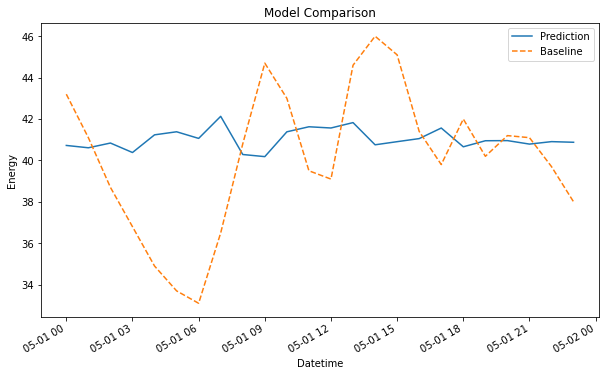

In [7]:
df_plot = pd.DataFrame(index=df_input.index[-h:])
df_plot['Baseline'] = X_test['y-24'].values
df_plot['Prediction'] = y_pred

fig, ax = plt.subplots(figsize=(10, 6))
df_plot['Prediction'].plot(ax=ax, label='Actual')
df_plot['Baseline'].plot(ax=ax, linestyle='--')
plt.autoscale()
plt.legend(['Prediction', 'Baseline'])
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.title('Model Comparison')
plt.show()

In [8]:
df_test = pd.concat([df_input, df_plot]).dropna(how='all')

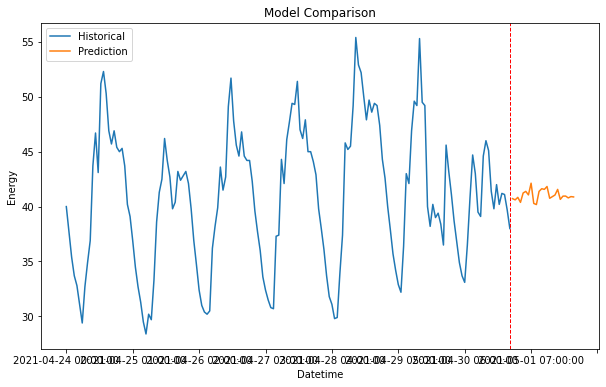

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
df_input.plot(ax=ax, label='energy')
df_test['Prediction'].plot(ax=ax, label='historical')
plt.axvline(x=len(df_input)-25, color='red', linestyle='--', linewidth=1)
plt.autoscale()
plt.legend(['Historical', 'Prediction'])
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.title('Model Comparison')
plt.show()

In [10]:
pd.DataFrame(df_plot['Prediction'])

,Prediction
2021-05-01 00:00:00,40.724719
2021-05-01 01:00:00,40.611858
2021-05-01 02:00:00,40.840679
2021-05-01 03:00:00,40.382976
2021-05-01 04:00:00,41.236697
2021-05-01 05:00:00,41.384685
2021-05-01 06:00:00,41.064650
2021-05-01 07:00:00,42.131011
2021-05-01 08:00:00,40.287031
2021-05-01 09:00:00,40.184113


## Predicting Week Ahead

In [11]:
df_input = pd.read_csv('./data/test.csv', index_col='datetime')

extended_index = pd.date_range(start=df_input.index[-1], periods=169, freq='H')[1:]
df_input = pd.concat([df_input, pd.DataFrame(index=extended_index)])

In [12]:
df_ts = pd.DataFrame()
df_ts['y'] = df_input[['energy']]

# df_ts['year'] = ts.index.year

# Lookback window size 
window_size = 24
h =168

for w in range(window_size):
    df_ts['y-' + str(w + 1)] = df_input[['energy']].shift(w+1)
    
df_ts = df_ts[window_size:]
# display(df_ts)

X = df_ts[df_ts.columns[1:]]
X = df_ts[df_ts.columns[1:]]  # Feature
Y = df_ts['y']  # Target

X_train = X[:-h]
X_test = X[-h:]
Y_train = Y[:-h]
Y_test = Y[-h:]

scaler_x = StandardScaler().fit(X_test)
scaler_y = StandardScaler().fit(df_input.values.reshape(-1, 1))
x_train = scaler_x.transform(X_test)

In [13]:
y_pred = model.predict(x_train)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

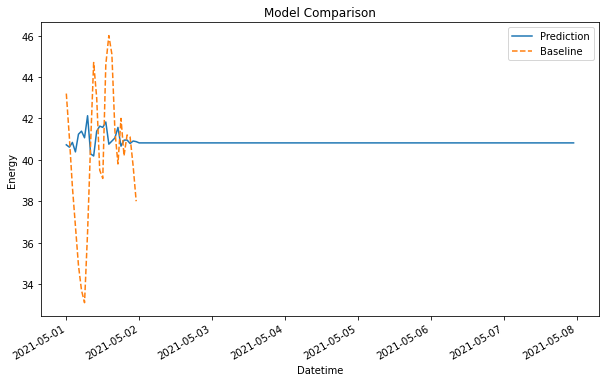

In [14]:
df_plot = pd.DataFrame(index=df_input.index[-h:])
df_plot['Baseline'] = X_test['y-24'].values
df_plot['Prediction'] = y_pred

fig, ax = plt.subplots(figsize=(10, 6))
df_plot['Prediction'].plot(ax=ax, label='Actual')
df_plot['Baseline'].plot(ax=ax, linestyle='--')
plt.autoscale()
plt.legend(['Prediction', 'Baseline'])
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.title('Model Comparison')
plt.show()

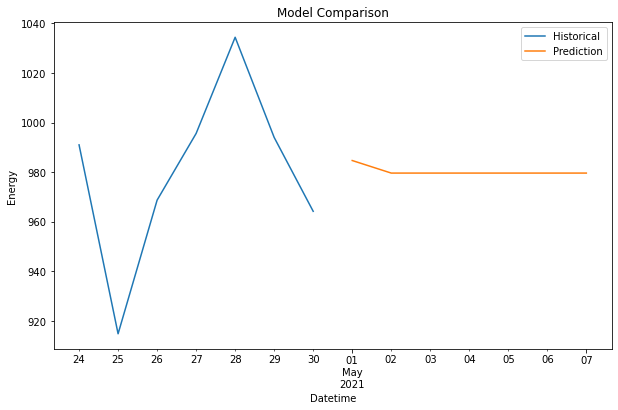

In [46]:
df_day = df_input.reset_index().dropna()
# Convert 'timestamp' column to datetime
df_day['index'] = pd.to_datetime(df_day['index'])
# Group by date (ignoring time)
df_input_day = df_day.groupby(df_day['index'].dt.floor('D')).sum()

df_day2 = df_test['Prediction'].reset_index().dropna()
# Convert 'timestamp' column to datetime
df_day2['index'] = pd.to_datetime(df_day2['index'])
# Group by date (ignoring time)
df_pred_day = df_day2.groupby(df_day2['index'].dt.floor('D')).sum()

fig, ax = plt.subplots(figsize=(10, 6))
df_input_day.plot(ax=ax, label='energy')
df_pred_day.plot(ax=ax, label='historical')
# plt.axvline(x=len(df_input)-25, color='red', linestyle='--', linewidth=1)
plt.autoscale()
plt.legend(['Historical', 'Prediction'])
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.title('Model Comparison')
plt.show()